# Grupo 1

Guilherme Sousa - pg51188

Karyna Lysenko - pg 51191 

Rodrigo Esperança-  

## Dataset Description: 

Mutagenicity means the ability of a drug to induce genetic alterations. Drugs that can cause damage to the DNA can result in cell death or other severe adverse effects. Nowadays, the most widely used assay for testing the mutagenicity of compounds is the Ames experiment which was invented by a professor named Ames. 

The Ames test is a short-term bacterial reverse mutation assay detecting a large number of compounds which can induce genetic damage and frameshift mutations. This test involves exposing bacteria to the chemical being tested and assessing the rate of genetic mutations compared to a control group that has not been exposed to the substance. If the rate of mutations in the exposed bacteria is significantly higher than in the control group, this suggests that the chemical is mutagenic and may pose a risk to human health.

The dataset is aggregated from four papers.


## Task Description: 

Binary classification. Given a drug SMILES string (representation of a molecule using an ASCII string that represents the chemical structure of the molecule), predict whether it is mutagenic (1) or not mutagenic (0).

## Dataset Statistics: 

7,273 drugs.

o que podemos ver a partir deste tipo de data set8algo a elimiar depois:

Identificação de compostos mutagênicos: Um conjunto de dados Ames pode ser usado para identificar quais compostos químicos têm a capacidade de causar mutações genéticas nas bactérias Salmonella typhimurium.

Avaliação da segurança química: Com base nos resultados dos testes de mutagenicidade, é possível avaliar a segurança de compostos químicos para o uso humano e ambiental. Se um composto é considerado altamente mutagênico, pode ser necessário regulamentar ou proibir o uso desse composto.

Desenvolvimento de modelos de QSAR: Os dados de um conjunto de dados Ames podem ser usados para desenvolver modelos de Relação Quantitativa entre Estrutura e Atividade (QSAR) que prevejam a mutagenicidade de novos compostos com base em sua estrutura química.

Avaliação de métodos de análise de dados: Os dados de um conjunto de dados Ames também podem ser usados para avaliar a eficácia de diferentes métodos de análise de dados na previsão da mutagenicidade de novos compostos.

In [53]:
#Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Importar os dados e sua respetiva visualização

In [5]:
df_ames = pd.read_csv('ames.csv')
print(df_ames)

            ids                                             smiles  Y
0        Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1
1        Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1
2        Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0
3        Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1
4        Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1
...         ...                                                ... ..
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0

[7273 rows x 3 columns]


In [6]:
df_features= pd.read_csv('ames_features.csv')
print(df_features)

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          11.663401       -0.396099          11.663401           0.008895   
1          11.824743       -0.170602          11.824743           0.170602   
2          14.431072       -0.378575          14.431072           0.128988   
3          10.422196       -0.670278          10.422196           0.248657   
4          10.521759       -0.752407          10.521759           0.278148   
...              ...             ...                ...                ...   
7268        8.502606        0.150556           8.502606           0.150556   
7269        2.303843        0.640191           2.303843           0.640191   
7270        5.671445       -1.672137           5.671445           0.713245   
7271       10.862176       -0.203597          10.862176           0.038935   
7272       12.621537       -0.362955          12.621537           0.362955   

           qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValence

# Merge dos dataframes

In [7]:
#juntar os dataframes para ser mais fácil trabalhar
df_global= pd.concat([df_ames, df_features], axis=1)
print(df_global)


            ids                                             smiles  Y  \
0        Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1   
1        Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1   
2        Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0   
3        Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1   
4        Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1   
...         ...                                                ... ..   
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0   
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0   
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0   
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0   
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          11.663401       -0.396099         

# Info sobre os dados e filtragem pré-precessamento

Os dados a ser tratados e analisados, englobam um conjunto de drogas identificados com um ID único, cuja composição química é representada numa string SMILES, sendo que cada droga tem associado diversos parametros. Estes parametros numéricos (exemplo:qed,MolWT,FpDensityMorgan1) descrevem as propriedades das respetivas drogas, o que pode auxiliar numa determinada interpretação biológica. Existe também parâmetros binários (0 ou 1) que indicam a ausência ou presença de algo, respetivamente. Existe uma propriedade indicada com o nome "Y" que indica se uma determinada droga tem um determinada capacidade mutagénica ou não. Se uma determinada droga tiver associada a um Y de valor 1, significa que a mesma pode causar mutações no material genético , como o DNA. A presença de mutações pode levar a uma variedade de efeitos adversos, incluindo o desenvolvimento de doenças genéticas, cancro e outras condições de saúde. Portanto, a capacidade de prever se um composto químico é mutagénico é importante para a segurança alimentar, farmacêutica e ambiental.

In [11]:
#NAN- valores ausentes
tem_nulos = df_global.isnull().sum(axis=1) > 0
print(df_global[tem_nulos])

#não existem valores NaN

Empty DataFrame
Columns: [ids, smiles, Y, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9

In [12]:
#remoção valores duplicados
tem_duplicados = df_global.duplicated(subset='ids', keep=False)
print(df_global[tem_duplicados])
#não existem  ids duplicados

Empty DataFrame
Columns: [ids, smiles, Y, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9

In [13]:
#Dimensões
print(df_global.shape)

#7273 linhas que representam o numero de drogas analisadas.
#211 colunas que sao os parametros caracteristicos de cada uma destas drogas.

(7273, 211)


In [23]:
#forma de visualizar as primeiras 5 linhas no nosso dataframe, ou seja as primeiras 5 drogas e respetivos parametros.
print(df_global.head(5))

      ids                                             smiles  Y  \
0  Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1   
1  Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1   
2  Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0   
3  Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1   
4  Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       11.663401       -0.396099          11.663401           0.008895   
1       11.824743       -0.170602          11.824743           0.170602   
2       14.431072       -0.378575          14.431072           0.128988   
3       10.422196       -0.670278          10.422196           0.248657   
4       10.521759       -0.752407          10.521759           0.278148   

        qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
0  0.181963  342.310         332.230  ...         0.0           0.0   
1  0

In [22]:
#forma de visualizar as últimas 5 linhas no nosso dataframe, ou seja as últimas 5 drogas e respetivos parametros.
print(df_global.tail(5))

            ids                                             smiles  Y  \
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0   
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0   
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0   
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0   
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
7268        8.502606        0.150556           8.502606           0.150556   
7269        2.303843        0.640191           2.303843           0.640191   
7270        5.671445       -1.672137           5.671445           0.713245   
7271       10.862176       -0.203597          10.862176           0.038935   
7272       12.621537       -0.362955          12.621537           0.362955   

           qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
7268  0.485970  23

In [24]:
#ver types de dados de cada coluna
print(df_global.dtypes)

ids                  object
smiles               object
Y                     int64
MaxEStateIndex      float64
MinEStateIndex      float64
                     ...   
fr_thiazole         float64
fr_thiocyan         float64
fr_thiophene        float64
fr_unbrch_alkane    float64
fr_urea             float64
Length: 211, dtype: object


In [25]:
#nome de todas as colunas
print(df_global.columns.tolist())

['ids', 'smiles', 'Y', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10

Através de uma simples análise dos dados do df_global é possivel verificar que não existe valores NaN , nem ids duplicados. O dataset possui 7273 linhas que corresponde às drogas analisadass e 211 colunas que retratam parametros caracteristicos das mesmas e que posteriormente serão importantes para retirar conclusões que permitam asssociar cada uma destas colunas à capacidade mutagénica.

In [30]:
#ordenar primeiro pelos Y, ascending, e depois pelos ids
df_global = df_global.sort_values(by=['Y', 'ids'])
df_global.tail()

,ids,smiles,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
991,Drug 992,Cc1ccc([N+]#N)cc1,1,8.253485,0.597778,8.253485,0.597778,0.481977,119.147,112.091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,Drug 994,O=[N+]([O-])c1ccccc1CCl,1,10.327561,-0.432824,10.327561,0.085648,0.389482,171.583,165.535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,Drug 995,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...,1,13.159159,-2.206177,13.159159,0.042079,0.375739,414.366,396.222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,Drug 998,O=C(O)CI,1,9.360556,-0.758704,9.360556,0.192222,0.477887,185.948,182.924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Drug 999,Oc1ccc2ccc3c4ccccc4cc4ccc1c2c43,1,10.159286,0.351906,10.159286,0.351906,0.292579,268.315,256.219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise descritiva dos dados

In [36]:
#info geral do nosso merge dataframe
df_global.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 10 to 998
Columns: 211 entries, ids to fr_urea
dtypes: float64(208), int64(1), object(2)
memory usage: 11.8+ MB


In [41]:
df_global.describe()

,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,...,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.00000,7273.000000,7273.000000
mean,0.546405,9.362443,-0.451765,9.362443,0.349721,0.510130,242.568881,229.065451,242.196954,88.108483,...,0.026674,0.011275,0.003162,0.003025,0.000412,0.012237,0.000550,0.00825,0.270727,0.017874
std,0.497876,3.029246,1.227820,3.029246,0.396510,0.167265,107.926752,102.707469,107.731070,39.772440,...,0.176611,0.111911,0.058548,0.054919,0.020307,0.114844,0.028719,0.09345,1.539449,0.138591
min,0.000000,1.500000,-9.055860,1.500000,0.000000,0.036666,41.053000,36.033000,41.026550,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,6.209384,-0.846972,6.209384,0.075424,0.396894,165.148000,156.100000,165.039000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,10.384028,-0.355799,10.384028,0.211296,0.510491,230.270000,218.173000,230.069140,84.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,11.488809,0.353001,11.488809,0.510718,0.621552,296.319000,280.241000,296.060400,108.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,17.286264,4.111111,17.286264,4.944445,0.935197,795.824000,766.923000,795.175400,314.000000,...,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.00000,29.000000,2.000000


In [52]:
df_global.apply(lambda x: str(x.min())+"---"+str (x.max()))

ids                                  Drug 0---Drug 999
smiles              Br/C=C/Br---c1scc2c1-c1cscc1C1OC21
Y                                                0---1
MaxEStateIndex                         1.5---17.286264
MinEStateIndex                     -9.05586---4.111111
                                   ...                
fr_thiazole                                  0.0---2.0
fr_thiocyan                                  0.0---2.0
fr_thiophene                                 0.0---2.0
fr_unbrch_alkane                            0.0---29.0
fr_urea                                      0.0---2.0
Length: 211, dtype: object

1    3974
0    3299
Name: Y, dtype: int64


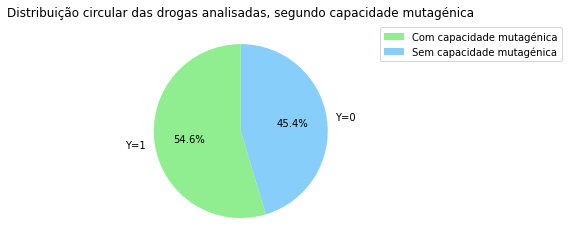

In [131]:
#gráfico circular para analisar a distribuição entre y 0 ou 1
frequence = df_global['Y'].value_counts()
print(frequence)
labels = ['Y=1', 'Y=0']
colors = ['lightgreen', 'lightskyblue']
plt.pie(frequence, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição circular das drogas analisadas, segundo capacidade mutagénica')
plt.legend(["Com capacidade mutagénica","Sem capacidade mutagénica"],bbox_to_anchor=(2, 1), loc='upper right', ncol=1)
plt.show()


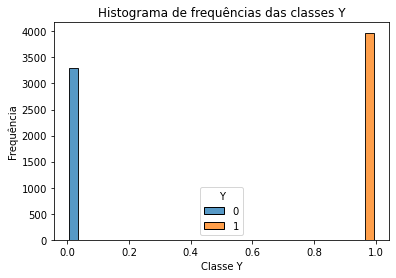

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_global, x='Y', hue='Y', multiple='dodge', shrink=.8)
plt.xlabel('Classe Y')
plt.ylabel('Frequência')
plt.title('Histograma de frequências das classes Y')
plt.show()





Era melhor juntar as conclusoes dos dois gráficos numa só, pq ambos apontam para a mesma conclusao ou seja no dataset temos mais drogas associadas a y=1 e portanto a capacidade muutagénica.Apenas um é em percentagem e visualmente mais angraçado e outro tem haver com a frqequencia

Pelo gráfico circular é possivel observar que há mais drogas que não apresentam capacidade mutagénica (54,6%), sendo a restante percentagem correspondente a drogas que possuem capacidade mutagénica.

Agora secalhar fazia uma introdução ao que significa as fr_ de modo geral sem especificar para todos , e qual o nosso objetivo que é associar o y=1 a compostos /drogas que estejam com maior e menor média tentando extrapolar a conclusao de que vamos ter uma determinaca coluna fr_ de uma determinada molecula quimica mais associada a mutação e a mesma coisa para y=0 , mas obviamente com uma maneira de pensar inversa

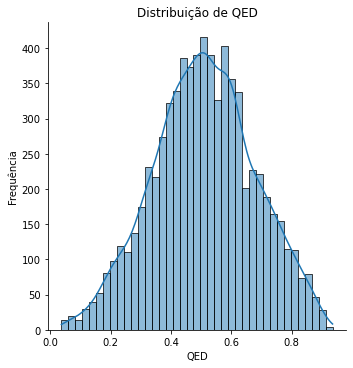

In [54]:
sns.displot(df_global, x='qed', kde=True)
plt.title('Distribuição de QED')
plt.xlabel('QED')
plt.ylabel('Frequência')
plt.show()

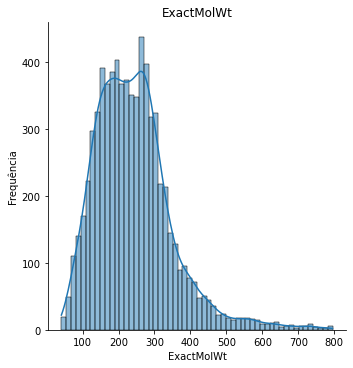

In [132]:
sns.displot(df_global, x='ExactMolWt', kde=True)
plt.title('ExactMolWt')
plt.xlabel('ExactMolWt')
plt.ylabel('Frequência')
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas que começam com "fr_"
cols_fr = df_global.filter(regex='^fr_').columns

# Aplicando a normalização apenas nessas colunas
scaler = StandardScaler()
df_global[cols_fr] = scaler.fit_transform(df_global[cols_fr])
df_global[cols_fr] 


,ids,smiles,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
10,Drug 10,Nc1nc(N)nc(N)n1,0,5.137222,0.041667,5.137222,0.041667,0.394014,126.123,120.075,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
999,Drug 1000,CCCC,0,2.180556,1.319444,2.180556,1.319444,0.431024,58.124,48.044,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
1003,Drug 1004,Brc1ccc(-c2ccccc2)cc1,0,3.417985,1.117760,3.417985,1.117760,0.694585,233.108,224.036,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
1005,Drug 1006,CN[C@@H](C)Cc1ccccc1,0,3.213398,0.567037,3.213398,0.567037,0.691109,149.237,134.117,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
1006,Drug 1007,Cc1ccc([N+](=O)[O-])cc1,0,10.117782,-0.403333,10.117782,0.144074,0.437912,137.138,130.082,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Drug 992,Cc1ccc([N+]#N)cc1,1,8.253485,0.597778,8.253485,0.597778,0.481977,119.147,112.091,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
993,Drug 994,O=[N+]([O-])c1ccccc1CCl,1,10.327561,-0.432824,10.327561,0.085648,0.389482,171.583,165.535,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
994,Drug 995,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...,1,13.159159,-2.206177,13.159159,0.042079,0.375739,414.366,396.222,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
997,Drug 998,O=C(O)CI,1,9.360556,-0.758704,9.360556,0.192222,0.477887,185.948,182.924,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981


In [73]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^fr_')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")


Coluna com maior média: fr_benzene
Coluna com menor média: fr_COO2


In [74]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^fr_')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: fr_COO2
Coluna com menor média: fr_benzene


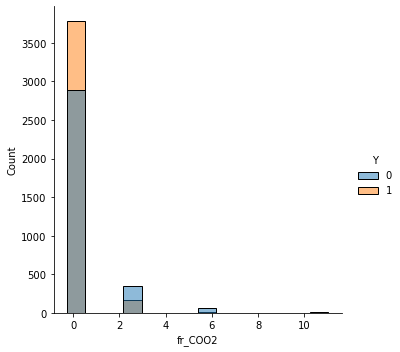

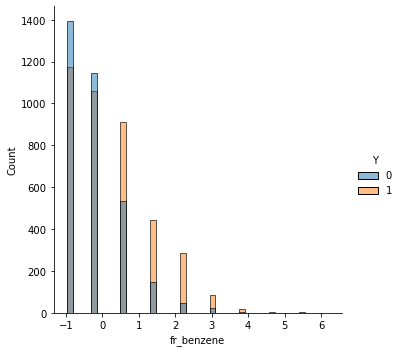

In [106]:
import seaborn as sns

# Filtrar os dados por y=1 e y=0
df_y1 = df_global[df_global['Y']==1]
df_y0 = df_global[df_global['Y']==0]

# Criar o displot para fr_C002 em relação a Y
sns.displot(data=df_global, x='fr_COO2', hue='Y', kde=False)

# Criar o displot para fr_benzene em relação a Y
sns.displot(data=df_global, x='fr_benzene', hue='Y', kde=False)



A barra cinza que você está se referindo é a barra de densidade de frequência estimada pelo seaborn. A cor cinza indica que essa densidade de frequência é compartilhada pelas duas categorias de y (y=0 e y=1). 

A parte colorida do gráfico indica a distribuição de fr_COO2 ou fr_benzene para cada categoria de y. Se você observar mais de perto, verá que a altura da barra colorida na parte superior corresponde à densidade de frequência estimada para a categoria y=1, enquanto a altura da barra colorida na parte inferior corresponde à densidade de frequência estimada para a categoria y=0. 

A barra de densidade cinza mostra a sobreposição das distribuições de y=0 e y=1, e a diferença na altura das barras coloridas mostra a diferença na distribuição de fr_COO2 ou fr_benzene entre as duas categorias de y.

In [109]:
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas que começam com "fr_"
cols_SMR = df_global.filter(regex='^SMR_VSA').columns

# Aplicando a normalização apenas nessas colunas
scaler = StandardScaler()
df_global[cols_SMR] = scaler.fit_transform(df_global[cols_SMR])
df_global[cols_SMR]

,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9
10,-1.036122,-0.092389,-0.151487,2.507759,-0.439277,-0.742669,0.892621,-1.394378,0.0,-0.525029
999,-1.036122,-1.188383,-0.151487,-0.594015,-0.439277,0.429995,-0.746279,-1.394378,0.0,-0.525029
1003,-1.036122,-0.210007,-0.151487,-0.594015,-0.439277,-0.742669,-0.746279,0.896484,0.0,1.127048
1005,-1.036122,-1.188383,-0.151487,0.508951,-0.439277,0.109129,-0.074782,-0.002282,0.0,-0.525029
1006,-0.556493,-0.839079,-0.151487,-0.594015,-0.439277,-0.438454,-0.746279,0.154707,0.0,-0.525029
...,...,...,...,...,...,...,...,...,...,...
991,-1.036122,-0.839079,4.874680,-0.594015,-0.439277,-0.438454,-0.746279,-0.044570,0.0,-0.525029
993,-0.556493,-0.126579,-0.151487,-0.594015,-0.439277,-0.484314,-0.746279,0.154707,0.0,-0.525029
994,3.313985,-0.122808,-0.151487,-0.594015,-0.439277,0.335860,0.560637,0.605998,0.0,2.035962
997,-0.071560,0.565709,-0.151487,-0.594015,-0.439277,-0.742669,-0.324425,-1.394378,0.0,-0.525029


In [110]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^SMR_VSA')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA7
Coluna com menor média: SMR_VSA5


In [112]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^SMR_VSA')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA5
Coluna com menor média: SMR_VSA7


In [139]:
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas que começam com "fr_"
cols_SlogP = df_global.filter(regex='^SlogP').columns

# Aplicando a normalização apenas nessas colunas
scaler = StandardScaler()
df_global[cols_SlogP] = scaler.fit_transform(df_global[cols_SlogP])
df_global[cols_SlogP]

,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9
10,2.675908,2.513085,-0.421256,-0.441593,-0.271546,-0.795797,-0.628698,-0.780329,-1.273520,-0.240166,-0.639963,0.0
999,-0.724149,-0.607150,-0.421256,-0.441593,-1.084027,-0.795797,-0.628698,0.463243,-1.273520,-0.240166,-0.639963,0.0
1003,-0.724149,-0.607150,-0.421256,0.775564,-1.084027,-0.795797,-0.628698,-0.780329,1.308981,-0.240166,0.303593,0.0
1005,0.326800,-0.607150,-0.421256,-0.441593,-0.372749,0.084091,-0.628698,-0.198492,0.052567,-0.240166,-0.639963,0.0
1006,-0.724149,0.387300,-0.421256,-0.441593,-0.816497,-0.795797,1.494343,-0.521102,-0.212651,-0.240166,-0.639963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
991,-0.724149,0.387300,-0.421256,-0.441593,-1.084027,-0.795797,0.906021,-0.521102,-0.212651,-0.240166,-0.218003,0.0
993,-0.724149,0.387300,-0.421256,0.444798,-0.816497,0.009979,0.631605,-0.521102,-0.212651,-0.240166,-0.639963,0.0
994,0.212169,-0.607150,3.028650,-0.441593,2.295898,0.741119,-0.628698,1.805425,-0.477868,-0.240166,-0.639963,0.0
997,-0.724149,-0.607150,-0.421256,1.284504,-0.241580,-0.138770,-0.628698,-0.780329,-1.273520,-0.240166,-0.639963,0.0


In [90]:
from scipy.stats import shapiro

# Selecionar as colunas SMR_VSA
cols_smr_vsa = [col for col in df_global.columns if col.startswith('SMR_VSA')]

# Loop sobre as colunas SMR_VSA
for col in cols_smr_vsa:
    # Teste de normalidade para a coluna
    stat, p = shapiro(df_global[col])
    
    # Imprime os resultados
    print(f'Coluna: {col}')
    print(f'Estatística: {stat:.3f}, Valor p: {p:.3f}')

    # Verifica se a distribuição é normal com nível de significância de 5%
    if p > 0.05:
        print('A distribuição é normal')
    else:
        print('A distribuição não é normal')


Coluna: SMR_VSA1
Estatística: 0.838, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA10
Estatística: 0.895, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA2
Estatística: 0.137, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA3
Estatística: 0.652, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA4
Estatística: 0.499, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA5
Estatística: 0.715, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA6
Estatística: 0.744, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA7
Estatística: 0.955, Valor p: 0.000
A distribuição não é normal
Coluna: SMR_VSA8
Estatística: 1.000, Valor p: 1.000
A distribuição é normal
Coluna: SMR_VSA9
Estatística: 0.594, Valor p: 0.000
A distribuição não é normal


c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [140]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^SlogP')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SlogP_VSA8
Coluna com menor média: SlogP_VSA5


In [141]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^SlogP')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SlogP_VSA5
Coluna com menor média: SlogP_VSA8


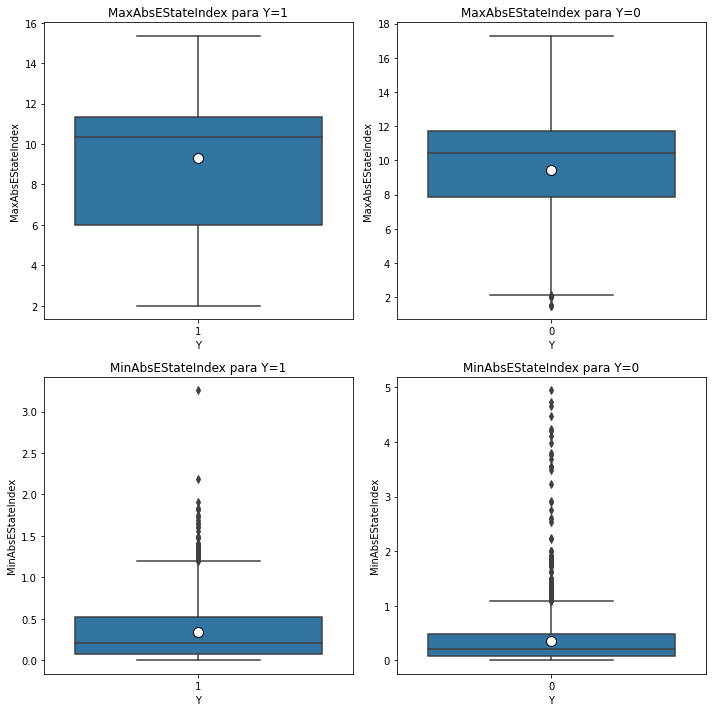

In [144]:
# criar os quatro dataframes para cada combinação de y e coluna
df_y1_maxabs = df_global[df_global['Y'] == 1][['Y', 'MaxAbsEStateIndex']]
df_y0_maxabs = df_global[df_global['Y'] == 0][['Y', 'MaxAbsEStateIndex']]
df_y1_minabs = df_global[df_global['Y'] == 1][['Y', 'MinAbsEStateIndex']]
df_y0_minabs = df_global[df_global['Y'] == 0][['Y', 'MinAbsEStateIndex']]

# criar a figura e os subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plotar cada boxplot nos subplots correspondentes
sns.boxplot(x='Y', y='MaxAbsEStateIndex', data=df_y1_maxabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[0, 0])
axs[0, 0].set_title('MaxAbsEStateIndex para Y=1')

sns.boxplot(x='Y', y='MaxAbsEStateIndex', data=df_y0_maxabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[0, 1])
axs[0, 1].set_title('MaxAbsEStateIndex para Y=0')

sns.boxplot(x='Y', y='MinAbsEStateIndex', data=df_y1_minabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[1, 0])
axs[1, 0].set_title('MinAbsEStateIndex para Y=1')

sns.boxplot(x='Y', y='MinAbsEStateIndex', data=df_y0_minabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[1, 1])
axs[1, 1].set_title('MinAbsEStateIndex para Y=0')

# ajustar o espaçamento entre os subplots
plt.tight_layout()

# exibir o gráfico
plt.show()





In [121]:
df_global.loc[df_global['MaxEStateIndex'].nlargest(5).index, ['MaxEStateIndex', 'SMR_VSA1', 'Y']]


,MaxEStateIndex,SMR_VSA1,Y
6175,17.286264,3.108051,0
5396,16.859064,1.818195,0
4765,15.351137,0.817620,1
6756,15.351137,0.817620,1
2471,15.192673,0.783869,1


In [114]:
from scipy.stats import ttest_ind
import seaborn as sns

# separar os dados em duas amostras (y=1 e y=0)
max_estate_y1 = df_global.loc[df_global['Y'] == 1, 'MaxEStateIndex']
max_estate_y0 = df_global.loc[df_global['Y'] == 0, 'MaxEStateIndex']

t_stat, p_value = ttest_ind(max_estate_y1, max_estate_y0)
print(f't-statistic: {t_stat:.4f}')
print(f'p-value: {p_value:.4f}')

t-statistic: -2.2548
p-value: 0.0242


## References:

[1] Xu, Congying, et al. “In silico prediction of chemical Ames mutagenicity.” Journal of chemical information and modeling 52.11 (2012): 2840-2847.